# Projeto C318
- Avner José Guimarães Ribeiro
- Bernardo Dalboni Gandolpho
- Fábio Luiz Fiorita Pontes

# Contextualização do Problema
## Objetivos de Negócios:
O objetivo principal deste projeto é desenvolver um sistema de detecção de phishing eficaz que possa ajudar a proteger os usuários da internet contra fraudes cibernéticas. Com o aumento das atividades online e o crescente número de ataques de phishing sofisticados, é crucial criar um mecanismo de defesa robusto para identificar e bloquear URLs maliciosas.

## Objetivos de Ciência de Dados:

- Coletar e explorar um conjunto de dados de URLs com características relevantes para a detecção de phishing;
- Desenvolver modelos de Machine Learning capazes de identificar URLs suspeitas e distinguir entre URLs legítimas e URLs de phishing;
- Avaliar o desempenho dos modelos usando métricas apropriadas, como precisão, recall e F1-score.

## Descrição do Problema:
O phishing é uma das ameaças mais comuns e eficazes utilizadas por cibercriminosos para enganar os usuários e roubar informações pessoais e financeiras. Com a nossa crescente dependência da internet, tornou-se fundamental desenvolver uma solução de detecção de phishing que seja capaz de identificar URLs maliciosas de maneira precisa e eficiente.

O conjunto de dados fornecido contém 11.430 URLs e 87 características extraídas deles, sendo uma referência para sistemas de detecção de phishing baseados em Machine Learning. Essas características são divididas em três classes: características extraídas da estrutura e sintaxe das URLs, características extraídas do conteúdo das páginas correspondentes e características obtidas por meio de consultas a serviços externos. O conjunto de dados é equilibrado, com 50% das URLs representando phishing e 50% sendo URLs legítimas.

Este projeto visa desenvolver modelos de Machine Learning que possam analisar as características das URLs e determinar se são suspeitas ou não.

# Enquadramento do Problema
Neste projeto de ciência de dados e Machine Learning, estamos enfrentando o desafio de detectar e classificar URLs como legítimas ou suspeitas de phishing. Para abordar esse problema, escolhemos enquadrá-lo como um problema de **Aprendizagem Supervisionada - Classificação**.

## Aprendizagem Supervisionada - Classificação

A escolha de enquadrar o problema como classificação é apropriada, uma vez que temos um conjunto de dados que inclui URLs rotuladas como phishing ou legítimas. Nossa tarefa principal é treinar um modelo de Machine Learning capaz de classificar novas URLs com base em suas características em uma das duas classes: "Phishing" ou "Legítima".

Isso implica que nosso modelo deve aprender com exemplos de URLs previamente rotuladas e desenvolver a capacidade de discernir entre as características que são indicativas de uma URL de phishing e aquelas que são típicas de URLs legítimas.


## Importações e cofigurações do NumPy e Pandas

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
pd.options.display.float_format = '{:.10f}'.format

np.random.seed(42)

## Carregando o Conjunto de Dados de Phishing

In [3]:
dataset_url = 'dataset_phishing.csv'

def load_phishing_data():
  return pd.read_csv(dataset_url)

phishing = load_phishing_data()
phishing.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.0000000000,0.0000000000,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.7500000000,7.0000000000,4.5000000000,0,0,0,0,0,0,17,0.5294117650,0.4705882350,0,0,0,0.8750000000,0,0.5000000000,0,0,80.0000000000,0,100.0000000000,0.0000000000,0,0,0,0.0000000000,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.2207792210,0.0000000000,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.7500000000,19.0000000000,14.6666666700,0,0,0,0,0,0,30,0.9666666670,0.0333333330,0,0,0,0.0000000000,0,0.0000000000,0,0,100.0000000000,0,80.0000000000,20.0000000000,0,0,0,100.0000000000,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.1507936510,0.0000000000,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.2500000000,8.4000000000,8.1428571430,0,0,0,0,0,0,4,1.0000000000,0.0000000000,0,0,0,0.0000000000,0,0.0000000000,0,0,100.0000000000,0,0.0000000000,0.0000000000,0,0,0,100.0000000000,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.0000000000,0.0000000000,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.0000000000,5.0000000000,0.0000000000,0,0,0,0,0,0,149,0.9731543620,0.0268456380,0,0,0,0.2500000000,0,0.2500000000,0,0,100.0000000000,0,96.4285714300,3.5714285710,0,0,0,62.5000000000,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.0000000000,0.0000000000,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.3333333330,5.0000000000,7.0000000000,0,0,0,0,0,0,102,0.4705882350,0.5294117650,0,0,0,0.5370370370,0,0.0185185190,1,0,76.4705882400,0,0.0000000000,100.0000000000,0,0,0,0.0000000000,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate


## Verificação do conjunto de dados

O conjunto de dados possui as seguintes características:

* **Total de entradas:** 11.430
* **Número de colunas:** 89
* **Tipos de dados:**
    * float64 (13 colunas)
    * int64 (74 colunas)
    * object (2 colunas)
* **Valores não nulos:** Todas as colunas possuem valores não nulos, o que sugere que o conjunto de dados está completo.

In [4]:
phishing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [5]:
phishing["status"].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

A variavel "Status" (Y) está balenceada entre as classes "Phishing" e "Legítima"

Com o método describe, podemos validar que as variaveis estão em escala diferente, o que pode prejudicar o desempenho de alguns modelos de Machine Learning.

In [6]:
phishing.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000,11430.0000000000
mean,61.1266841645,21.0902887139,0.1505686789,2.4807524059,0.9975503062,0.0222222222,0.1412073491,0.1622922135,0.0000000000,0.2931758530,0.3226596675,0.0066491689,0.1230971129,4.2895888014,0.0006999125,1.0279090114,0.0040244969,0.0622922135,0.0019247594,0.0348206474,0.4484689414,0.1279965004,0.0065616798,0.0167104112,0.6109361330,0.0531373016,0.0250237095,0.0003499563,0.0023622047,0.0656167979,0.0501312336,0.0216097988,2.2316710411,0.2024496938,0.0832895888,0.1234470691,0.0001749781,0.4982502187,0.0031496063,6.2328083990,2.9274715661,3.1272965879,5.0197725284,2.3989501312,15.3938757655,10.4679790026,10.5615048119,7.2588816921,7.6780745220,5.0924247019,0.3277340332,0.1041994751,0.0041119860,0.0048993876,0.0179352581,0.0597550306,87.1897637795,0.6024572495,0.2767203533,0.0000000000,0.7848643920,0.0000000000,0.1589256155,0.0000000000,0.0624686285,0.0636045494,0.4421697288,51.9782107909,0.0000000000,42.8704436344,23.2362930235,0.0000000000,0.0013123360,0.0060367454,37.0639217317,0.0011373578,0.0013998250,0.1247594051,0.7758530184,0.4395450569,0.0728783902,492.5321959755,4062.5437445319,856756.6433070867,0.0201224847,0.5339457568,3.1857392826
std,55.2973180350,10.7771710760,0.3576435970,1.3696862350,2.0870866419,0.1554998532,0.3644557738,0.8213374141,0.0000000000,0.9983172348,1.0933356751,0.0812744444,1.4664504982,1.

Utilizaremos o valor 1 para a classe "Phishing" e 0 para a classe "Legítima"

In [7]:
phishing = phishing.drop("url", axis=1) #Revomendo coluna "URL" que é única para todos os items
phishing['status'].replace(['phishing','legitimate'], [1,0], inplace=True)

## Separando o dataset em treino e teste

Iremos separar o dataset em treino e teste, utilizando 30% do dataset para teste e 70% para treino utilizando o método de amostragem aleatória simples do Sklearn.

In [8]:
from sklearn.model_selection import train_test_split

phishing_labels = phishing['status'].copy()

train_set, test_set = train_test_split(phishing, test_size = 0.3, stratify=phishing_labels)

In [9]:
pd.options.display.float_format = "{:,.2f}".format

x_train = train_set.drop("status", axis=1)
y_train = train_set["status"].copy()
x_test = test_set.drop("status", axis=1)
y_test = test_set["status"].copy()

original_phishing_proportion = phishing_labels.value_counts() / len(phishing_labels) * 100
train_dataset_proportion = y_train.value_counts() / len(y_train) * 100
test_dataset_proportion = y_test.value_counts() / len(y_test) * 100

pd.DataFrame(
    {
        'Original %': original_phishing_proportion,
        'Train Dataset %': train_dataset_proportion,
        'Test Dataset %': test_dataset_proportion
    }
)

,Original %,Train Dataset %,Test Dataset %
status,,,
0,50.00,49.99,50.01
1,50.00,50.01,49.99


Podemos verificar que a proporção de classes do dataset original foi mantida no dataset de treino e teste.

## Análise de correlação entre as features

In [10]:
corr_matrix = train_set.corr()

In [11]:
corr_matrix["status"].sort_values(ascending=False)

status                        1.00
google_index                  0.73
ratio_digits_url              0.35
domain_in_title               0.34
phish_hints                   0.33
ip                            0.31
nb_qm                         0.29
nb_slash                      0.24
length_hostname               0.24
length_url                    0.24
nb_eq                         0.23
ratio_digits_host             0.23
tld_in_subdomain              0.21
empty_title                   0.21
prefix_suffix                 0.21
longest_word_path             0.21
shortest_word_host            0.21
avg_word_path                 0.20
nb_dots                       0.20
longest_words_raw             0.20
length_words_raw              0.19
avg_word_host                 0.18
avg_words_raw                 0.17
nb_and                        0.16
nb_com                        0.16
statistical_report            0.14
nb_at                         0.14
abnormal_subdomain            0.13
longest_word_host   

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

length_url_ix = train_set.columns.get_loc("length_url")
nb_dots_ix = train_set.columns.get_loc("nb_dots")
length_hostname_ix = train_set.columns.get_loc("length_hostname")
nb_subdomains_ix = train_set.columns.get_loc("nb_subdomains")
length_words_raw_ix = train_set.columns.get_loc("length_words_raw")
avg_words_raw_ix = train_set.columns.get_loc("avg_words_raw")

class CustomFeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        url_length_ratio = X["length_url"] / X["nb_dots"]
        hostname_length_ratio = X["length_hostname"] / X["nb_dots"]
        avg_word_length = X["length_words_raw"] / X["avg_words_raw"]
        subdomain_length_ratio = X["length_url"] / X["nb_subdomains"]
        path_length_ratio = X["length_url"] / X["length_words_raw"]

        return pd.concat([X, url_length_ratio, hostname_length_ratio, avg_word_length, subdomain_length_ratio, path_length_ratio], axis=1)

feature_adder = CustomFeatureAdder()
train_set_transformed = feature_adder.transform(train_set)
train_set_transformed.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,0,1,2,3,4
10415,17,10,0,1,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.00,0.00,0,0,0,0,0,1,0,1,0,0,1,0,1,0,7,7,0,7,7,0,7.00,7.00,0.00,0,0,0,0,0,0,19,0.68,0.32,0,1,0,0.17,0,0.17,0,1,60.00,0,66.67,33.33,0,0,0,85.71,0,0,0,0,0,1,0,-1,955197,0,0,1,0,17.00,10.00,0.14,17.00,17.00
7511,80,23,0,2,8,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.03,0.00,0,0,0,0,0,2,0,0,0,0,2,0,11,5,2,3,2,14,14,7,5.27,8.50,4.56,0,0,0,0,0,0,18,0.17,0.83,0,0,0,0.00,0,0.00,0,0,14.29,0,0.00,0.00,0,0,0,10.00,0,0,0,1,0,1,0,1759,8326,0,1,5,0,40.00,11.50,2.09,40.00,7.27
9420,50,17,0,3,0,0,0,0,0,0,3,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,8,3,1,3,1,9,9,7,4.00,6.00,3.33,0,0,0,0,0,0,46,0.89,0.11,0,0,0,0.20,0,0.00,1,0,50.00,0,100.00,0.00,0,0,0,33.33,0,0,0,0,1,0,1658,7108,135545,0,0,5,0,16.67,5.67,2.00,16.67,6.25
7614,78,29,0,2,0,0,0,0,0,0,1,0,0,6,0,1,0,0,0,0,0,0,0,0,1,0.03,0.00,0,0,0,0,0,2,0,0,0,0,1,0,6,1,1,25,1,25,25,18,10.17,25.00,7.20,0,0,0,0,0,0,26,0.77,0.23,0,2,0,0.00,0,0.00,0,1,50.00,0,0.00,0.00,0,0,0,100.00,0,0,0,1,1,0,591,4522,0,0,1,0,1,39.00,14.50,0.59,39.00,13.00
10855,46,25,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,1,0,0,1,0.00,0.00,0,0,1,0,0,2,0,0,0,0,1,0,3,4,3,3,13,17,17,13,11.00,10.00,13.00,0,0,0,0,0,0,185,0.86,0.14,0,0,0,0.00,0,0.00,0,1,61.54,0,100.00,0.00,0,0,0,59.26,0,0,0,1,1,0,2506,6259,683,0,0,6,0,23.00,12.50,0.27,23.00,15.33


Adicionamos algumas features de combinações de features já existentes, para tentar encontrar outras correlações.


In [13]:
from sklearn.base import BaseEstimator, TransformerMixin

status_ix = train_set.columns.get_loc("status")

class CustomFeatureRemover(BaseEstimator, TransformerMixin):
    def __init__(self, nan_threshold=0.03, low_corr_threshold=0.03, include_feature_remover=True):
        self.include_feature_remover = include_feature_remover
        self.nan_threshold = nan_threshold
        self.low_corr_threshold = low_corr_threshold
        self.features_to_remove = []

    def fit(self, X, y=None):
        corr_matrix = X.corr().abs()
        nan_corr_features = corr_matrix["status"][corr_matrix["status"].isna()].index.tolist()
        low_corr_features = corr_matrix["status"][corr_matrix["status"] < self.low_corr_threshold].index.tolist()

        self.features_to_remove = nan_corr_features + low_corr_features

        return self

    def transform(self, X):
        X = X.drop(columns=self.features_to_remove)
        return X

feature_remover = CustomFeatureRemover()
train_set_transformed = feature_remover.fit_transform(train_set_transformed)
train_set_transformed.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_colon,nb_semicolumn,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,shortening_service,nb_external_redirection,length_words_raw,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,nb_extCSS,ratio_extRedirection,ratio_extErrors,external_favicon,links_in_tags,ratio_intMedia,ratio_extMedia,popup_window,safe_anchor,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,0,1,2,3
10415,17,10,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,0.00,0.00,0,0,0,1,0,0,0,1,7,7,0,7,7,0,7.00,7.00,0.00,0,0,0,0,0,0,19,0.68,0.32,1,0.17,0.17,1,60.00,66.67,33.33,0,85.71,0,0,0,1,0,-1,955197,0,0,1,0,17.00,10.00,0.14,17.00
7511,80,23,0,2,8,0,0,0,0,0,0,0,3,1,0,1,0,0,0,1,0.03,0.00,0,0,0,2,0,0,0,11,2,3,2,14,14,7,5.27,8.50,4.56,0,0,0,0,0,0,18,0.17,0.83,0,0.00,0.00,0,14.29,0.00,0.00,0,10.00,0,1,0,1,0,1759,8326,0,1,5,0,40.00,11.50,2.09,40.00
9420,50,17,0,3,0,0,0,0,0,3,0,0,4,1,0,1,0,0,0,1,0.00,0.00,0,0,0,3,0,0,0,8,1,3,1,9,9,7,4.00,6.00,3.33,0,0,0,0,0,0,46,0.89,0.11,0,0.20,0.00,0,50.00,100.00,0.00,0,33.33,0,0,1,0,1658,7108,135545,0,0,5,0,16.67,5.67,2.00,16.67
7614,78,29,0,2,0,0,0,0,0,1,0,0,6,1,0,0,0,0,0,1,0.03,0.00,0,0,0,2,0,0,0,6,1,25,1,25,25,18,10.17,25.00,7.20,0,0,0,0,0,0,26,0.77,0.23,2,0.00,0.00,1,50.00,0.00,0.00,0,100.00,0,1,1,0,591,4522,0,0,1,0,1,39.00,14.50,0.59,39.00
10855,46,25,0,2,0,0,0,0,0,0,0,0,3,1,0,1,1,0,0,1,0.00,0.00,1,0,0,2,0,0,0,3,3,3,13,17,17,13,11.00,10.00,13.00,0,0,0,0,0,0,185,0.86,0.14,0,0.00,0.00,1,61.54,100.00,0.00,0,59.26,0,1,1,0,2506,6259,683,0,0,6,0,23.00,12.50,0.27,23.00


Retiramos do dataset as features que possuem baixa ou nenhuma correlação com a variavel de saida "status".

In [14]:
corr_matrix = train_set_transformed.corr()
corr_matrix["status"].sort_values(ascending=False)

status                        1.00
google_index                  0.73
ratio_digits_url              0.35
domain_in_title               0.34
phish_hints                   0.33
ip                            0.31
nb_qm                         0.29
nb_slash                      0.24
length_hostname               0.24
length_url                    0.24
3                             0.23
nb_eq                         0.23
ratio_digits_host             0.23
tld_in_subdomain              0.21
empty_title                   0.21
prefix_suffix                 0.21
longest_word_path             0.21
shortest_word_host            0.21
avg_word_path                 0.20
nb_dots                       0.20
longest_words_raw             0.20
length_words_raw              0.19
0                             0.19
avg_word_host                 0.18
avg_words_raw                 0.17
nb_and                        0.16
nb_com                        0.16
statistical_report            0.14
nb_at               

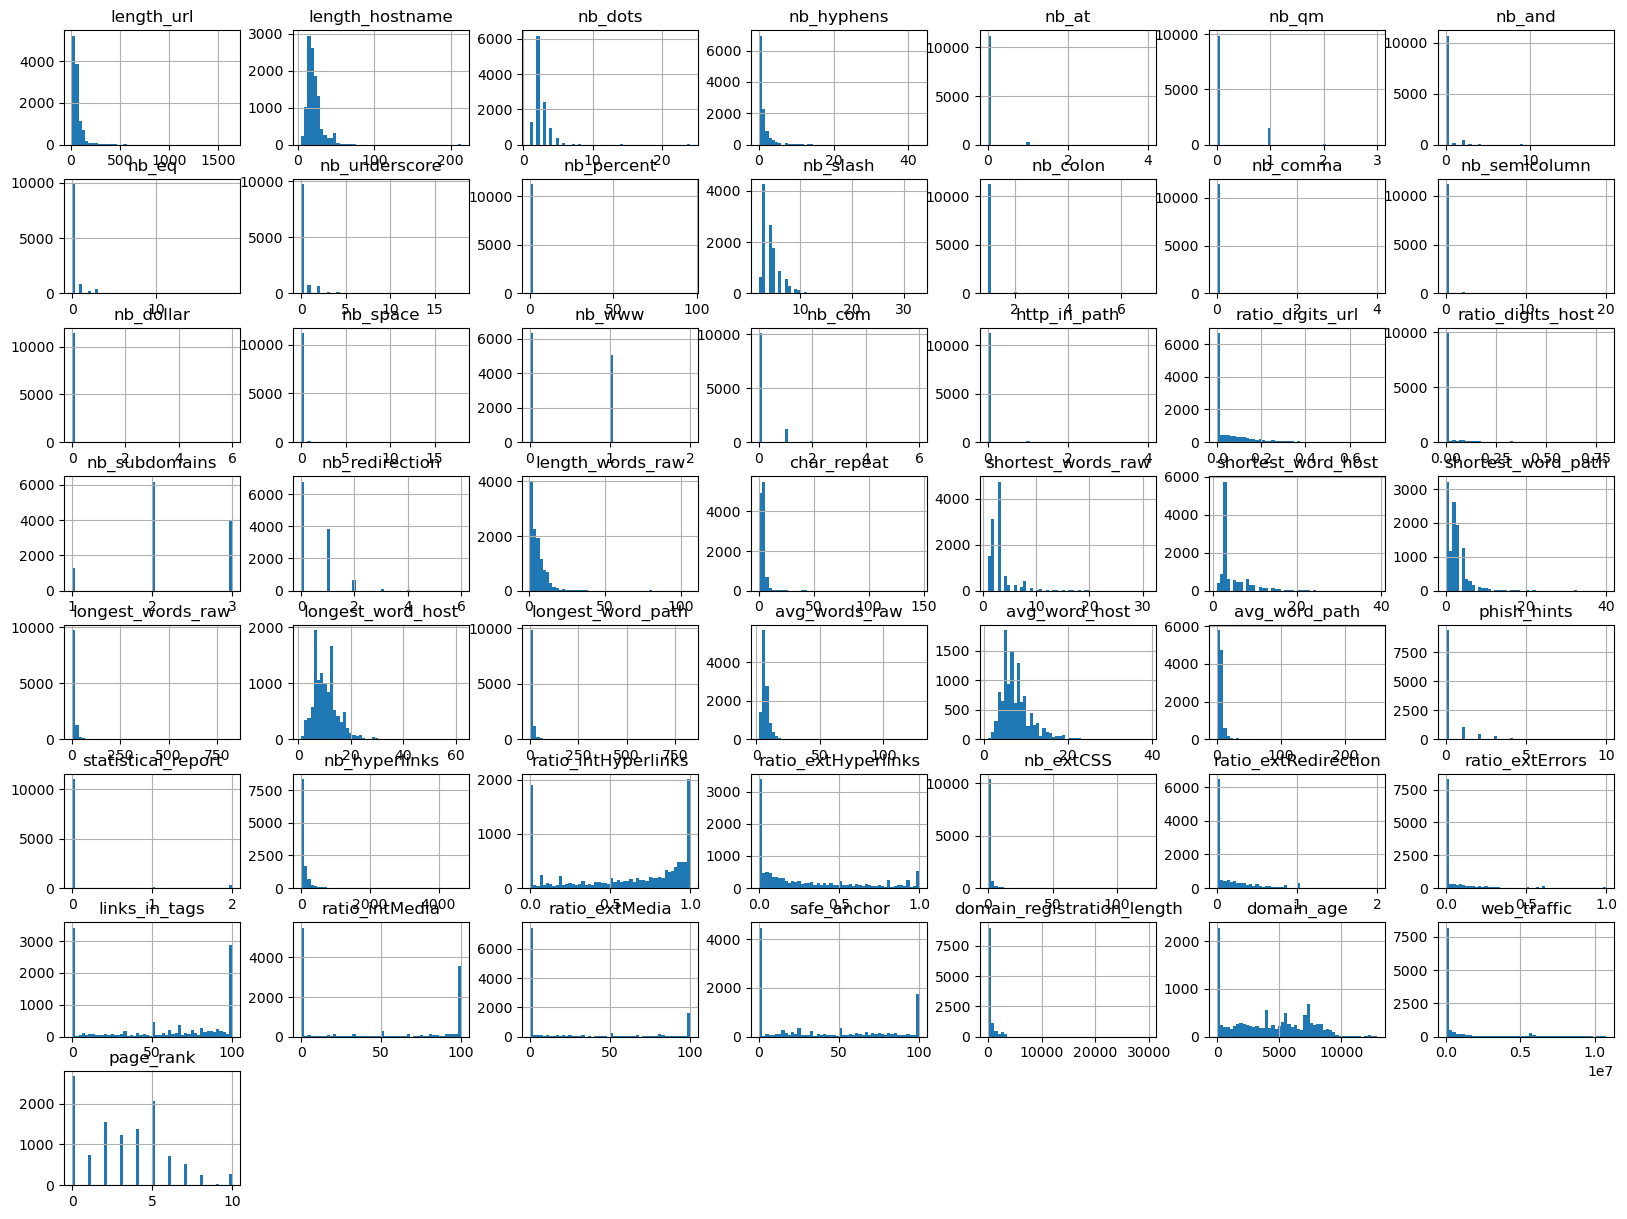

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

non_binary_columns = phishing.columns[phishing.nunique() > 2]

phishing[non_binary_columns].hist(bins=50, figsize=(20,15))

plt.show()

- Podemos verificar pelo histograma que as features possuem escalas diferentes, porém nenhuma feature parece que possui seus rotulos limitados;
- Conseguimos verificar também que a maioria das features possuem uma distribuição com calda curta, o que pode ser um indicativo de que possuem poucos outliers.

## Definindo uma função para avaliar a performance de cada modelo

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def model_performance(model):
    y_pred = model.predict(x_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

### Criando Pipelines para o modelo

In [203]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

rf_param_grid = {
    'scaler': [MinMaxScaler(feature_range=(0, 1)), StandardScaler()],
    'selector': [SelectKBest(f_classif), RFECV(RandomForestClassifier(n_estimators=350), cv=5, step=1, scoring='accuracy')],
    # 'rf__n_estimators': [100, 200]
}

pipe_rf = Pipeline([
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('selector', SelectKBest(f_classif)),
    ('rf', RandomForestClassifier(n_estimators=350))
])

knn_param_grid = {
    'scaler': [MinMaxScaler(feature_range=(0, 1)), StandardScaler()],
    'selector': [SelectKBest(f_classif), RFECV(RandomForestClassifier(n_estimators=350), cv=5, step=1, scoring='accuracy')],
    # 'knn__n_neighbors': [2, 3]
}

pipe_knn = Pipeline([
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('selector', SelectKBest(f_classif)),
    ('knn', KNeighborsClassifier(n_neighbors=4))
])

sgd_param_grid = {
    'scaler': [MinMaxScaler(feature_range=(0, 1)), StandardScaler()],
    'selector': [SelectKBest(f_classif), RFECV(RandomForestClassifier(n_estimators=350), cv=5, step=1, scoring='accuracy')],
}

pipe_sgd = Pipeline([
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('selector', SelectKBest(f_classif)),
    ('sgd', SGDClassifier())
])

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_grid_search = GridSearchCV(pipe_rf, rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
knn_grid_search = GridSearchCV(pipe_knn, knn_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
sgd_grid_search = GridSearchCV(pipe_sgd, sgd_param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grids = [rf_grid_search, knn_grid_search, sgd_grid_search]

for grid in grids:
    grid.fit(x_train, y_train)
    best_params = grid.best_params_
    best_model = grid.best_estimator_
    accuracy = best_model.score(x_test, y_test)

    print("Melhores parâmetros:", best_params)
    print("Acurácia do melhor modelo nos dados de teste:", accuracy)
    print("Performance do melhor modelo nos dados de teste:")
    model_performance(best_model)
    print("--------------------------------------------------")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid_search = RandomizedSearchCV(pipe_rf, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search = RandomizedSearchCV(pipe_knn, knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
sgd_grid_search = RandomizedSearchCV(pipe_sgd, sgd_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grids = [rf_grid_search, knn_grid_search, sgd_grid_search]

for grid in grids:
    grid.fit(x_train, y_train)
    best_params = grid.best_params_
    best_model = grid.best_estimator_
    accuracy = best_model.score(x_test, y_test)

    print("Melhores parâmetros:", best_params)
    print("Acurácia do melhor modelo nos dados de teste:", accuracy)
    print("Performance do melhor modelo nos dados de teste:")
    model_performance(best_model)
    print("--------------------------------------------------")

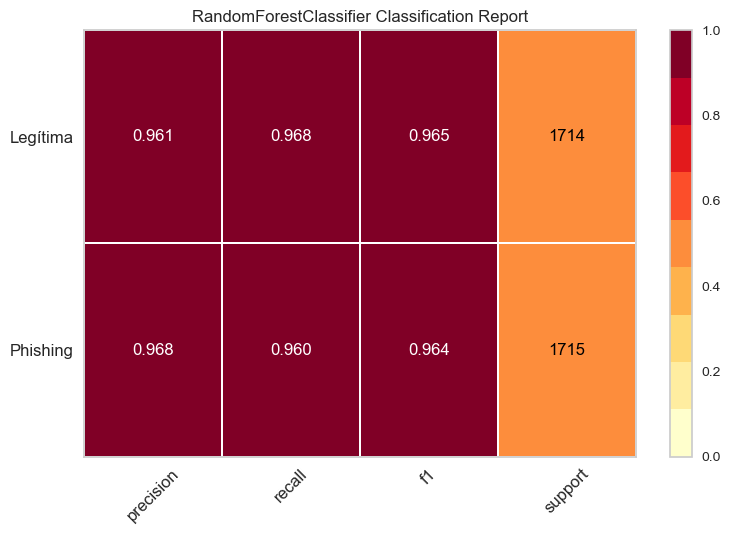

/Users/fabiofiorita/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


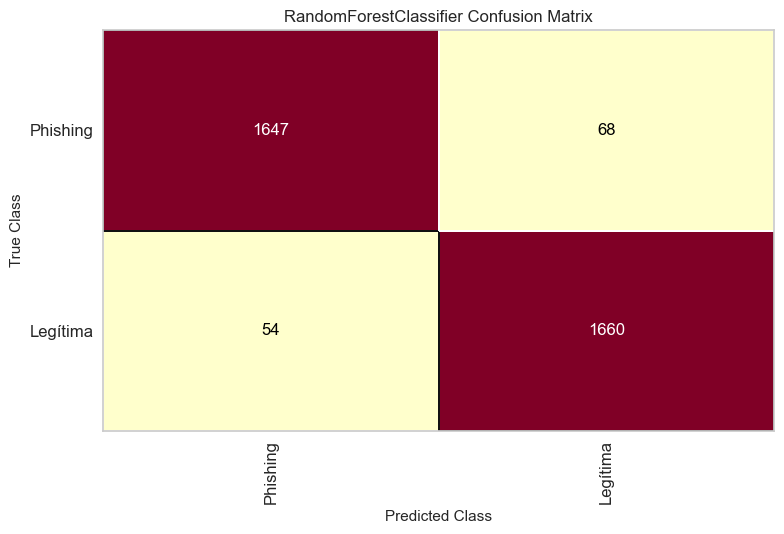

/Users/fabiofiorita/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


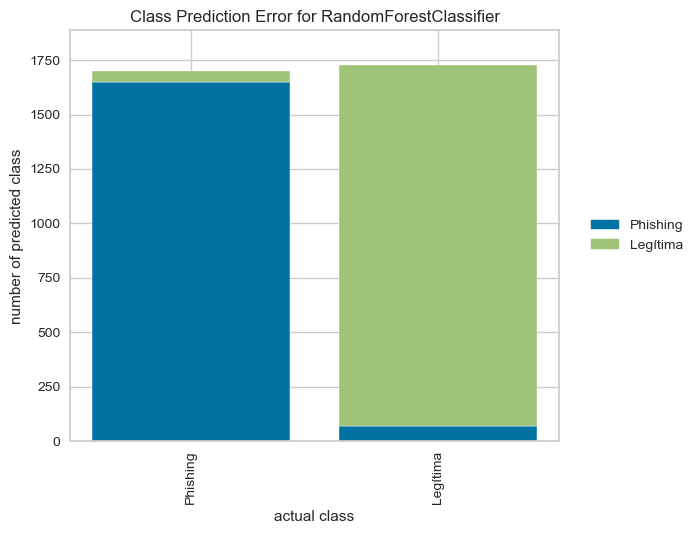

/Users/fabiofiorita/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


YellowbrickTypeError: could not find feature importances param on Pipeline

In [205]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError

classes = ["Phishing", "Legítima"]

best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', RFECV(RandomForestClassifier(n_estimators=350), cv=5, step=1, scoring='accuracy')),
    ('rf', RandomForestClassifier(n_estimators=350))
])

vizualizer = ClassificationReport(best_pipeline, classes=classes, support=True)
vizualizer.fit(x_train, y_train)
vizualizer.score(x_test, y_test)
vizualizer.show()

vizualizer = ConfusionMatrix(best_pipeline, classes=classes, label_encoder={0: 'Phishing', 1: 'Legítima'})
vizualizer.fit(x_train, y_train)
vizualizer.score(x_test, y_test)
vizualizer.show()

vizualizer = ClassPredictionError(best_pipeline, classes=classes, label_encoder={0: 'Phishing', 1: 'Legítima'})
vizualizer.fit(x_train, y_train)
vizualizer.score(x_test, y_test)
vizualizer.show()